<a href="https://colab.research.google.com/github/byronacunia/EA513U/blob/main/Potencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A figura a seguir mostra o diagrama unifilar de um sistema eletrico de potencia trifasico e seu respectivo modelo por fase.

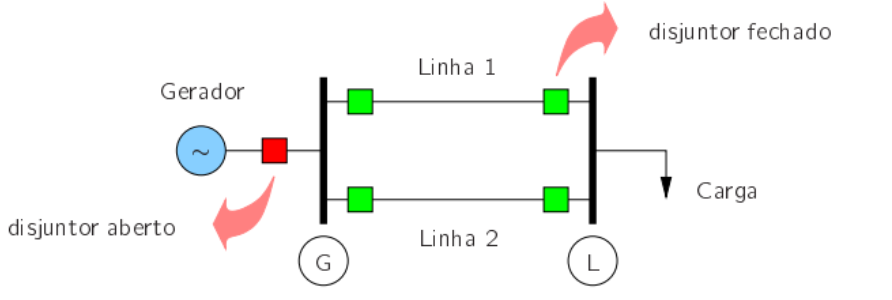

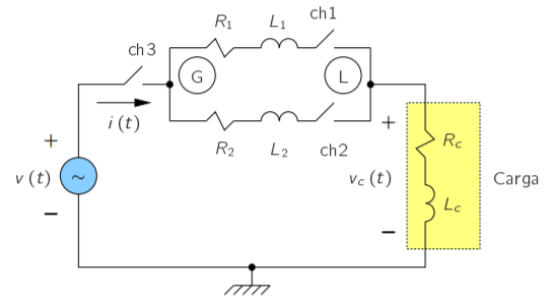

O gerador fornece uma tensão de linha senoidal cujo valor eficaz (rms)100/√2 KV em 60 Hz. As linhas de transmissão são idênticas com resistencias de 10 Ω e indutâncias de 500 mH por fase. A carga é modelada como uma impedância constante de resistência e indutância respetivamente iguais a 100 Ω e 3 H por fase. Os disjuntores das linhas de transmissão (modelados pelas chaves ch1 e ch2) estão inicialmente fechados. O disjuntor do gerador (modelado pela chave ch3) esta inicialmente aberto.

Analise no regime pemanente quando o disjuntor do gerador (ch3) é fechado. 
Obter:

a) o valor eficaz da tensão na carga

b) Potência complexa, ativa e reativa da carga

In [1]:
import math
import numpy as np
import cmath

In [2]:
Vrms=(100/(math.sqrt(2)))*1000
teta=0#(math.pi/180)
f=60 #Hz
R1=10
R2=10
L1=0.5 #Henrios
L2=0.5 # Henrios
Rc=100
Lc=3

In [3]:
w=2*math.pi*f

Reatâncias das linhas de transmissão

In [4]:
XL1=1j*w*L1
XL2=1j*w*L2

Impedancias das linhas de transmissão

In [5]:
z1=R1+XL1
z2=R2+XL2

Impedancia da carga

In [6]:
XLcarga=1j*w*Lc

In [7]:
Zcarga=Rc+XLcarga

Paralelo das linhas de transmisao

In [8]:
Zeq1=(z1*z2)/(z1+z2)

Impedancia equivalente

In [9]:
Zeq=Zeq1+Zcarga

Corrente total

In [11]:
Irmsfonte=(Vrms/Zeq)
Irmsfonte

(4.90984084034941-57.29181682467969j)

In [12]:
Irmspolar = cmath.polar(Irmsfonte)
Irmspolar

(57.501815729159496, -1.4853063905104882)

Tensão na carga

In [13]:
Vcargarms=Irmsfonte*Zcarga

In [14]:
Vcargarms_polar = cmath.polar(Vcargarms)
Vcargarms_polar

(65286.74038208778, -0.002700130631107968)

In [15]:
Irmsfonte_conj=Irmsfonte.conjugate()

In [16]:
S=Vcargarms*Irmsfonte_conj
S

(330645.8812150214+3739516.816913404j)

In [17]:
P=Vcargarms_polar[0]*Irmspolar[0]*math.cos(Vcargarms_polar[1]-Irmspolar[1])
P

330645.88121502154

Potência na Fonte

In [18]:
Sfonte=Vrms*Irmsfonte_conj
Sfonte

(347178.1752757724+4051143.218322854j)

Perdas

In [19]:
S_perdas=Sfonte-S
S_perdas

(16532.29406075098+311626.40140945j)